# Analysis


Temperature vs Latitude at the Northern hemisphere has a negative correlation whereas Temperature vs Latitude at the Southern hemisphere shows a positive correlation.
This demonstrates the temperature hikes for the cities closer to the equator.

Humidity % increases with the latitude. 
The temperature and the humidity % are inversely proportional.The cities which are in higher latitudes, signifies the temperature drops and hence relative humidity increases. 

Wind speed increases with latitude
The air currents flows from the low pressure system - the equator, towards the high pressure area - the poles, causing winds

In [31]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
import datetime as dt

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [32]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination 
# using citipy module
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [33]:
#Init the lists
name=[]
lat=[]
max_temp=[]
lng=[]
humidity=[]
cloud=[]
wind_speed=[]
country=[]
date=[]
weather_data={}
#Build partial query URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=d178fb16918d814296102796efe8a578&units=imperial&q=


In [34]:
for city in cities : 
    try:
        response=requests.get(query_url + city).json()
        name.append(response['name']) 
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        raw_date=response['dt']
        conv_date=time.strftime("%D %H:%M", time.localtime(int(raw_date)))
        date.append(conv_date)
        count = cities.index(city)
        cname = response['name']
        print(f'Processing Record {count}: {cname} {conv_date}')
    except KeyError :
        print(f'City {city} not found')

Processing Record 0: Upernavik 12/17/20 13:31
Processing Record 1: Castro 12/17/20 13:35
Processing Record 2: Vaini 12/17/20 13:35
City taolanaro not found
Processing Record 4: Mataura 12/17/20 13:35
Processing Record 5: Naze 12/17/20 13:35
Processing Record 6: Melville 12/17/20 13:34
Processing Record 7: Nortelândia 12/17/20 13:35
Processing Record 8: Bethel 12/17/20 13:35
Processing Record 9: Nome 12/17/20 13:35
Processing Record 10: Punta Arenas 12/17/20 13:33
Processing Record 11: Aldan 12/17/20 13:35
Processing Record 12: Bull Savanna 12/17/20 13:35
Processing Record 13: Hermanus 12/17/20 13:35
Processing Record 14: Hilo 12/17/20 13:31
Processing Record 15: Khatanga 12/17/20 13:35
Processing Record 16: Provideniya 12/17/20 13:35
Processing Record 17: Busselton 12/17/20 13:35
Processing Record 18: Avarua 12/17/20 13:33
Processing Record 19: Kahului 12/17/20 13:33
Processing Record 20: Rey Bouba 12/17/20 13:35
Processing Record 21: Verāval 12/17/20 13:35
Processing Record 22: Saint-

City tumannyy not found
Processing Record 182: Qaanaaq 12/17/20 13:35
Processing Record 183: Treinta y Tres 12/17/20 13:35
Processing Record 184: Olafsvik 12/17/20 13:35
Processing Record 185: Praia da Vitória 12/17/20 13:35
Processing Record 186: Iqaluit 12/17/20 13:35
Processing Record 187: Bluff 12/17/20 13:35
City labutta not found
Processing Record 189: Cidreira 12/17/20 13:35
Processing Record 190: Kendari 12/17/20 13:35
Processing Record 191: Staroderevyankovskaya 12/17/20 13:35
Processing Record 192: Port-Gentil 12/17/20 13:35
Processing Record 193: Mahébourg 12/17/20 13:35
City samusu not found
Processing Record 195: Broome 12/17/20 13:35
Processing Record 196: Saldanha 12/17/20 13:35
Processing Record 197: Zhangaözen 12/17/20 13:35
Processing Record 198: Andenes 12/17/20 13:35
Processing Record 199: Abu Dhabi 12/17/20 13:35
Processing Record 200: Sragen 12/17/20 13:35
City halalo not found
Processing Record 202: Samarai 12/17/20 13:35
Processing Record 203: Mehamn 12/17/20 13

Processing Record 364: Great Falls 12/17/20 13:36
Processing Record 365: San Carlos 12/17/20 13:36
Processing Record 366: Najrān 12/17/20 13:36
Processing Record 367: Zhuhai 12/17/20 13:36
Processing Record 368: Huarmey 12/17/20 13:36
Processing Record 369: Ponta do Sol 12/17/20 13:36
City karamay not found
Processing Record 371: Volda 12/17/20 13:36
Processing Record 372: Petropavlovsk-Kamchatskiy 12/17/20 13:36
Processing Record 373: Casian 12/17/20 13:36
Processing Record 374: Bichena 12/17/20 13:36
Processing Record 375: Chui 12/17/20 13:36
Processing Record 376: Alenquer 12/17/20 13:36
Processing Record 377: Bontang 12/17/20 13:36
City palabuhanratu not found
Processing Record 379: Tūkrah 12/17/20 13:36
Processing Record 380: Kasempa 12/17/20 13:36
Processing Record 381: Strizhi 12/17/20 13:36
Processing Record 382: San Cristobal 12/17/20 13:36
Processing Record 383: Baruun-Urt 12/17/20 13:36
Processing Record 384: West Freehold 12/17/20 13:36
Processing Record 385: Buala 12/17/20

Processing Record 540: Gravdal 12/17/20 13:36
Processing Record 541: Fort Nelson 12/17/20 13:36
Processing Record 542: Khanpur 12/17/20 13:36
Processing Record 543: Jūybār 12/17/20 13:36
Processing Record 544: Sambava 12/17/20 13:36
Processing Record 545: Bayangol 12/17/20 13:36
Processing Record 546: Örnsköldsvik 12/17/20 13:36
Processing Record 547: Kwang Binh 12/17/20 13:36
Processing Record 548: Batemans Bay 12/17/20 13:36
Processing Record 549: Chamba 12/17/20 13:36
Processing Record 550: Matara 12/17/20 13:36
Processing Record 551: Merritt Island 12/17/20 13:36
Processing Record 552: Alliston 12/17/20 13:34
Processing Record 553: Isangel 12/17/20 13:36
Processing Record 554: Portobelo 12/17/20 13:36
Processing Record 555: Am Timan 12/17/20 13:36
Processing Record 556: Talavera 12/17/20 13:36
Processing Record 557: Kanasín 12/17/20 13:36
Processing Record 558: Solwezi 12/17/20 13:36
Processing Record 559: Punta Alta 12/17/20 13:36
Processing Record 560: Piney Green 12/17/20 13:36


In [36]:
weather_dict = {
    "City": name,
    "Lat": lat,
    "Lng" : lng,
    "Max temp": max_temp,
    "Humidity" : humidity,
    "Cloudiness" : cloud,
    "Wind speed" : wind_speed, 
    "Country" : country,
    "Date" : date
}


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [37]:
weather_data = pd.DataFrame(weather_dict)
weather_data.to_csv(output_data_file, index=False)
weather_data.head()

,City,Lat,Lng,Max temp,Humidity,Cloudiness,Wind speed,Country,Date
0,Upernavik,72.79,-56.15,10.04,83,46,3.87,GL,12/17/20 13:31
1,Castro,-24.79,-50.01,71.69,87,27,7.65,BR,12/17/20 13:35
2,Vaini,-21.20,-175.20,75.20,83,90,10.29,TO,12/17/20 13:35
3,Mataura,-46.19,168.86,53.01,90,100,1.01,NZ,12/17/20 13:35
4,Naze,28.37,129.48,57.20,58,75,9.17,JP,12/17/20 13:35


In [38]:
weather_data=pd.read_csv(output_data_file)
weather_data.head()

,City,Lat,Lng,Max temp,Humidity,Cloudiness,Wind speed,Country,Date
0,Upernavik,72.79,-56.15,10.04,83,46,3.87,GL,12/17/20 13:31
1,Castro,-24.79,-50.01,71.69,87,27,7.65,BR,12/17/20 13:35
2,Vaini,-21.20,-175.20,75.20,83,90,10.29,TO,12/17/20 13:35
3,Mataura,-46.19,168.86,53.01,90,100,1.01,NZ,12/17/20 13:35
4,Naze,28.37,129.48,57.20,58,75,9.17,JP,12/17/20 13:35


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [39]:
#  Get the indices of cities that have humidity over 100%.
humid= (weather_data['Humidity'] > 100)
humid_cities=weather_data[humid]



In [40]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

print(f'There are {len(humid_cities)} cities with humidity > 100%')

There are 0 cities with humidity > 100%


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

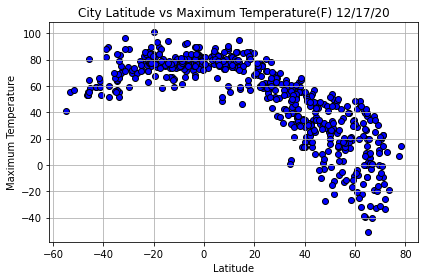

In [41]:
x_val=weather_data["Lat"]
y_val=weather_data["Max temp"]
mdate=weather_data["Date"][0][0:8]
plt.scatter(x_val, 
            y_val, 
            facecolors='blue',
            edgecolors='black')
plt.title(f"City Latitude vs Maximum Temperature(F) {mdate}")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature")
plt.tight_layout()
plt.grid()
plt.savefig("../output_data/fig1")
                      


## Latitude vs. Humidity Plot

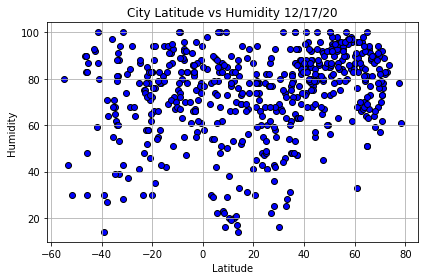

In [42]:
x_val=weather_data["Lat"]
y_val=weather_data["Humidity"]
plt.scatter(x_val, 
            y_val, 
            facecolors='blue',
            edgecolors='black')
plt.title(f"City Latitude vs Humidity {mdate}")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.tight_layout()
plt.grid()
plt.savefig("../output_data/fig2")

## Latitude vs. Cloudiness Plot

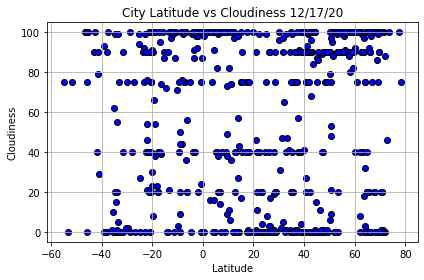

In [43]:
x_val=weather_data["Lat"]
y_val=weather_data["Cloudiness"]
plt.scatter(x_val, 
            y_val, 
            facecolors='blue',
            edgecolors='black')
plt.title(f"City Latitude vs Cloudiness {mdate}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.tight_layout()
plt.grid()
plt.savefig("../output_data/fig3")

## Latitude vs. Wind Speed Plot

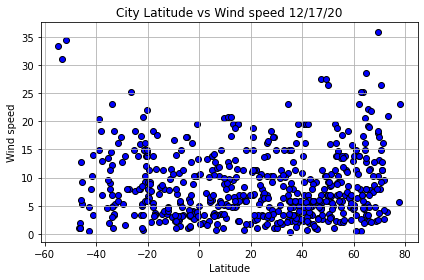

In [44]:
x_val=weather_data["Lat"]
y_val=weather_data["Wind speed"]
plt.scatter(x_val, 
            y_val, 
            facecolors='blue',
            edgecolors='black')
plt.title(f"City Latitude vs Wind speed {mdate}")
plt.xlabel("Latitude")
plt.ylabel("Wind speed")
plt.tight_layout()
plt.grid()
plt.savefig("../output_data/fig4")

## Linear Regression

In [45]:
northern= weather_data.loc[weather_data['Lat'] > 0]
southern= weather_data.loc[weather_data['Lat'] < 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Correlation between Max temp and Latitude is :-0.84
Linear equation for regression : y = -1.28x + 90.09 


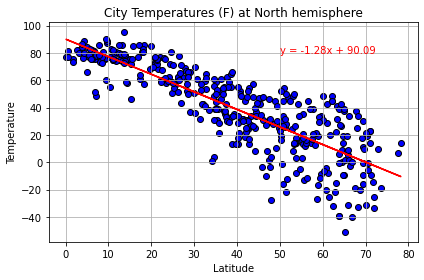

In [46]:
x_values=northern['Lat']
y_values=northern["Max temp"]

#Calculating correlation and regression
correlation = st.pearsonr(x_values, y_values)
print(f'Correlation between Max temp and Latitude is :{round(correlation[0], 2)}')
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
r_val = slope * northern['Lat'] + intercept
linear_equ=f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
print(f'Linear equation for regression : {linear_equ} ')

#plot the linear regression model
plt.scatter(x_values, 
            y_values, 
            facecolors='blue',
            edgecolors='black'
            )
plt.title("City Temperatures (F) at North hemisphere")
plt.plot(x_values,r_val, "r-")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.annotate(linear_equ, (50, 80), fontsize=10, color='red')
plt.tight_layout()
plt.grid()
plt.savefig("../output_data/fig5")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Correlation between Max temp and Latitude is :0.53
Linear equation for regression : y = 0.41x + 82.93 


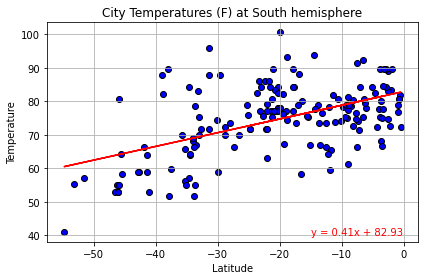

In [47]:
x_values=southern['Lat']
y_values=southern["Max temp"]

#Calculating correlation and regression
correlation = st.pearsonr(x_values, y_values)
print(f'Correlation between Max temp and Latitude is :{round(correlation[0], 2)}')
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
r_val = slope * southern['Lat'] + intercept
linear_equ=f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
print(f'Linear equation for regression : {linear_equ} ')

#plot the linear regression model
plt.scatter(x_values, 
            y_values, 
            facecolors='blue',
            edgecolors='black'
            )
plt.title("City Temperatures (F) at South hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.annotate(linear_equ, (-15, 40), fontsize=10, color='red')
plt.plot(x_values,r_val, "r-")
plt.tight_layout()
plt.grid()
plt.savefig("../output_data/fig6")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Correlation between Max temp and Latitude is :0.38
Linear equation for regression : y = 0.36x + 60.63 


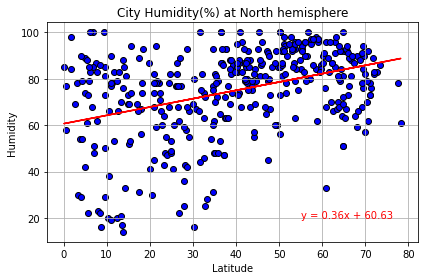

In [48]:
x_values=northern['Lat']
y_values=northern["Humidity"]

#Calculating correlation and regression
correlation = st.pearsonr(x_values, y_values)
print(f'Correlation between Max temp and Latitude is :{round(correlation[0], 2)}')
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
r_val = slope * x_values + intercept
linear_equ=f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
print(f'Linear equation for regression : {linear_equ} ')

#plot the linear regression model
plt.scatter(x_values, 
            y_values, 
            facecolors='blue',
            edgecolors='black'
            )
plt.title("City Humidity(%) at North hemisphere")
plt.annotate(linear_equ, (55, 20), fontsize=10, color='red')
plt.plot(x_values,r_val, "r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.tight_layout()
plt.grid()
plt.savefig("../output_data/fig7")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Correlation between Max temp and Latitude is :0.21
Linear equation for regression : y = 0.27x + 78.28 


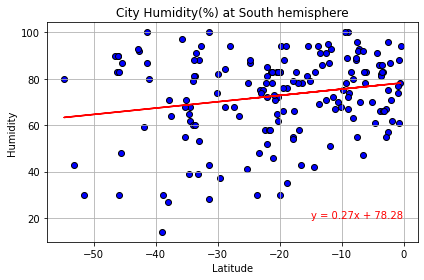

In [49]:
x_values=southern['Lat']
y_values=southern["Humidity"]

#Calculating correlation and regression
correlation = st.pearsonr(x_values, y_values)
print(f'Correlation between Max temp and Latitude is :{round(correlation[0], 2)}')
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
r_val = slope * x_values + intercept
linear_equ=f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
print(f'Linear equation for regression : {linear_equ} ')

#plot the linear regression model
plt.scatter(x_values, 
            y_values, 
            facecolors='blue',
            edgecolors='black'
            )
plt.title("City Humidity(%) at South hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.plot(x_values,r_val, "r-")
plt.annotate(linear_equ, (-15, 20), fontsize=10, color='red')
plt.tight_layout()
plt.grid()
plt.savefig("../output_data/fig8")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Correlation between Max temp and Latitude is :0.16
Linear equation for regression : y = 0.32x + 42.96 


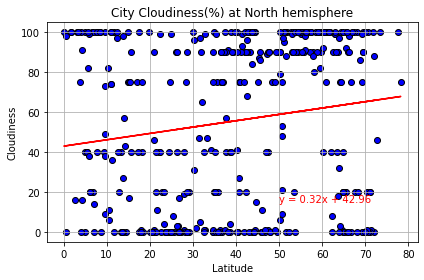

In [50]:
x_values=northern['Lat']
y_values=northern["Cloudiness"]

#Calculating correlation and regression
correlation = st.pearsonr(x_values, y_values)
print(f'Correlation between Max temp and Latitude is :{round(correlation[0], 2)}')
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
r_val = slope * x_values + intercept
linear_equ=f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
print(f'Linear equation for regression : {linear_equ} ')

#plot the linear regression model
plt.scatter(x_values, 
            y_values, 
            facecolors='blue',
            edgecolors='black'
            )
plt.title("City Cloudiness(%) at North hemisphere")
plt.plot(x_values,r_val, "r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(linear_equ, (50, 15), fontsize=10, color='red')
plt.tight_layout()
plt.grid()
plt.savefig("../output_data/fig9")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Correlation between Max temp and Latitude is :0.19
Linear equation for regression : y = 0.55x + 70.07 


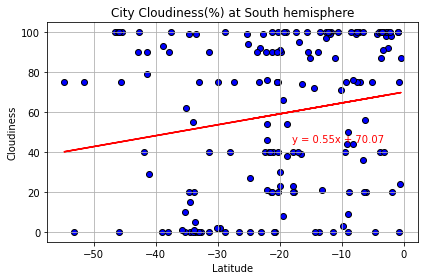

In [51]:
x_values=southern['Lat']
y_values=southern["Cloudiness"]

#Calculating correlation and regression
correlation = st.pearsonr(x_values, y_values)
print(f'Correlation between Max temp and Latitude is :{round(correlation[0], 2)}')
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
r_val = slope * x_values + intercept
linear_equ=f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
print(f'Linear equation for regression : {linear_equ} ')

#plot the linear regression model
plt.scatter(x_values, 
            y_values, 
            facecolors='blue',
            edgecolors='black'
            )
plt.title("City Cloudiness(%) at South hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.plot(x_values,r_val, "r-")
plt.annotate(linear_equ, (-18, 45), fontsize=10, color='red')
plt.tight_layout()
plt.grid()
plt.savefig("../output_data/fig10")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Correlation between Max temp and Latitude is :0.15
Linear equation for regression : y = 0.05x + 6.69 


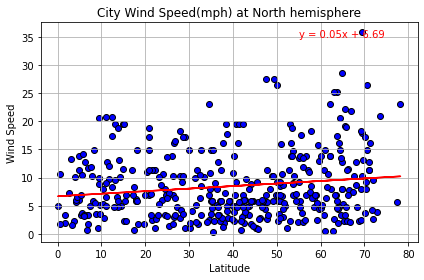

In [52]:
x_values=northern['Lat']
y_values=northern["Wind speed"]

#Calculating correlation and regression
correlation = st.pearsonr(x_values, y_values)
print(f'Correlation between Max temp and Latitude is :{round(correlation[0], 2)}')
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
r_val = slope * x_values + intercept
linear_equ=f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
print(f'Linear equation for regression : {linear_equ} ')

#plot the linear regression model
plt.scatter(x_values, 
            y_values, 
            facecolors='blue',
            edgecolors='black'
            )
plt.title("City Wind Speed(mph) at North hemisphere")
plt.plot(x_values,r_val, "r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(linear_equ, (55, 35), fontsize=10, color='red')
plt.tight_layout()
plt.grid()
plt.savefig("../output_data/fig11")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Correlation between Max temp and Latitude is :-0.27
Linear equation for regression : y = -0.13x + 6.04 


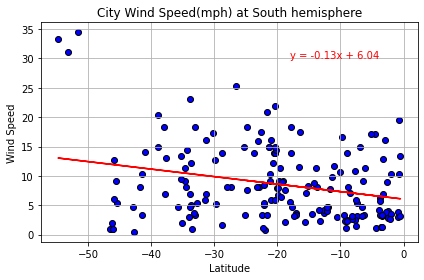

In [53]:
x_values=southern['Lat']
y_values=southern["Wind speed"]

#Calculating correlation and regression
correlation = st.pearsonr(x_values, y_values)
print(f'Correlation between Max temp and Latitude is :{round(correlation[0], 2)}')
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
r_val = slope * x_values + intercept
linear_equ=f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
print(f'Linear equation for regression : {linear_equ} ')

#plot the linear regression model
plt.scatter(x_values, 
            y_values, 
            facecolors='blue',
            edgecolors='black'
            )
plt.title("City Wind Speed(mph) at South hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.plot(x_values,r_val, "r-")
plt.annotate(linear_equ, (-18, 30), fontsize=10, color='red')
plt.tight_layout()
plt.grid()
plt.savefig("../output_data/fig12")